In [1]:
"""Codes From https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/notebooks/2_BasicModels/linear_regression.ipynb"""
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [7]:
X.shape

(17,)

In [8]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [9]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [10]:
#Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.144840, W: 0.399379, b: -0.248636
step: 100, loss: 0.137073, W: 0.390674, b: -0.186920
step: 150, loss: 0.130194, W: 0.382481, b: -0.128840
step: 200, loss: 0.124102, W: 0.374772, b: -0.074183
step: 250, loss: 0.118707, W: 0.367516, b: -0.022746
step: 300, loss: 0.113929, W: 0.360688, b: 0.025661
step: 350, loss: 0.109697, W: 0.354263, b: 0.071215
step: 400, loss: 0.105949, W: 0.348216, b: 0.114085
step: 450, loss: 0.102630, W: 0.342525, b: 0.154430
step: 500, loss: 0.099691, W: 0.337170, b: 0.192397
step: 550, loss: 0.097087, W: 0.332130, b: 0.228127
step: 600, loss: 0.094782, W: 0.327387, b: 0.261751
step: 650, loss: 0.092740, W: 0.322924, b: 0.293395
step: 700, loss: 0.090932, W: 0.318723, b: 0.323174
step: 750, loss: 0.089330, W: 0.314770, b: 0.351199
step: 800, loss: 0.087912, W: 0.311050, b: 0.377572
step: 850, loss: 0.086656, W: 0.307550, b: 0.402391
step: 900, loss: 0.085543, W: 0.304255, b: 0.425748
step: 950, loss: 0.084558, W: 0.301155, b: 0.447729
step: 10

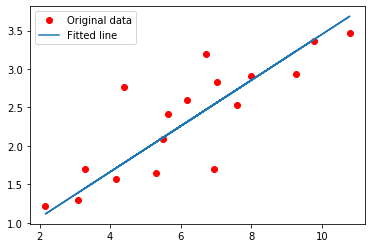

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

In [17]:
print(W.numpy())

0.29823688


In [18]:
print(b.numpy())

0.46841457


In [19]:
my_predict=7

In [20]:
my_y=W.numpy()*my_predict+b.numpy()

In [21]:
print(my_y)

2.55607271194458
